2024-07-12 07:30:53.712421: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


initializing
initializing finished
start compile
compile finished, cost time: 17.313040s
Generation: 1, Cost time: 123.35ms
 	fitness: valid cnt: 10000, max: -0.2506, min: -0.4900, mean: -0.3263, std: 0.0472

	node counts: max: 5, min: 4, mean: 4.09
 	conn counts: max: 5, min: 1, mean: 2.88
 	species: 7, [9990, 2, 3, 1, 1, 2, 1]

Generation: 2, Cost time: 18.94ms
 	fitness: valid cnt: 10000, max: -0.2500, min: -0.4827, mean: -0.2590, std: 0.0117

	node counts: max: 6, min: 4, mean: 4.47
 	conn counts: max: 7, min: 0, mean: 2.45
 	species: 20, [6066, 659, 943, 720, 536, 350, 177, 2, 96, 1, 1, 70, 82, 173, 4, 4, 17, 1, 4, 94]

Generation: 3, Cost time: 22.50ms
 	fitness: valid cnt: 9724, max: -0.2500, min: -0.4810, mean: -0.2538, std: 0.0102

	node counts: max: 7, min: 4, mean: 4.63
 	conn counts: max: 7, min: 0, mean: 1.92
 	species: 20, [1538, 2324, 210, 1892, 381, 318, 288, 306, 245, 978, 260, 182, 164, 152, 294, 187, 86, 133, 42, 20]

Generation: 4, Cost time: 22.51ms
 	fitness: vali

/root/wanglishuang/tensorneat_offical/tensorneat/src/tensorneat/genome/default.py:160: UserWarning: genome.output_transform is not None but sympy_output_transform is None!
  warnings.warn(


\begin{align}
h_{0} &= \frac{1}{2.29 e^{- 17.99 h_{2} + 6.53 h_{4} + 0.02 h_{5}} + 1}\newline
h_{1} &= \frac{1}{0.21 e^{0.1 h_{6}} + 1}\newline
h_{2} &= \frac{1}{0.14 e^{- 2.72 h_{1} - 13.1 i_{0} + 11.51 i_{1} + 11.09 i_{2}} + 1}\newline
h_{3} &= \frac{1}{1.15 e^{0.25 i_{2}} + 1}\newline
h_{4} &= \frac{1}{1.53 e^{- 1.17 h_{5} - 0.26 h_{8} - 0.44 i_{2}} + 1}\newline
h_{5} &= \frac{1}{1 + 0.15 e^{- 2.25 h_{1}}}\newline
h_{6} &= \frac{1}{1.2 e^{- 0.45 h_{3} - 0.13 i_{2}} + 1}\newline
h_{7} &= \frac{1}{1 + 0.46 e^{- 1.14 h_{1}}}\newline
h_{8} &= \frac{1}{1 + 0.11 e^{- 0.91 h_{6}}}\newline
o_{0} &= - 19.4 h_{0} - 9.02 h_{2} + 9.09 h_{5} + 10.01 h_{7} + 14.11 i_{0} - 14.1 i_{1} - 13.65 i_{2} + 3.62\newline
\end{align}

h = np.zeros(9)
o = np.zeros(1)
h[0] = 1/(2.286112*exp(-17.990682*h[2] + 6.527691*h[4] + 0.016731*h[5]) + 1)
h[1] = 1/(0.213837*exp(0.10407*h[6]) + 1)
h[2] = 1/(0.140065*exp(-2.720749*h[1] - 13.097381*i[0] + 11.51199*i[1] + 11.090915*i[2]) + 1)
h[3] = 1/(1.147046*exp(0.247421*

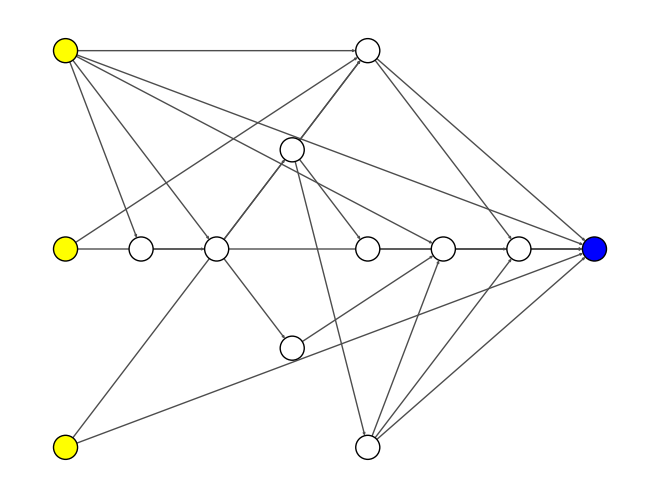

In [1]:
import sys
sys.path.append("/root/wanglishuang/tensorneat_offical/tensorneat/src")

from tensorneat.pipeline import Pipeline
from tensorneat import algorithm, genome, problem, common

algorithm = algorithm.NEAT(
    pop_size=10000,
    species_size=20,
    survival_threshold=0.01,
    genome=genome.DefaultGenome(
        num_inputs=3,
        num_outputs=1,
        output_transform=common.ACT.sigmoid,
    ),
)
problem = problem.XOR3d()

pipeline = Pipeline(
    algorithm,
    problem,
    generation_limit=200,
    fitness_target=-1e-6,
    seed=42,
)
state = pipeline.setup()
# run until terminate
state, best = pipeline.auto_run(state)
# show result
pipeline.show(state, best)

# visualize the best individual
network = algorithm.genome.network_dict(state, *best)
algorithm.genome.visualize(network, save_path="./network.svg")

# transform the best individual to latex formula
from tensorneat.common.sympy_tools import to_latex_code, to_python_code
sympy_res = algorithm.genome.sympy_func(state, network)
latex_code = to_latex_code(*sympy_res)
print(latex_code)

# transform the best individual to python code
python_code = to_python_code(*sympy_res)
print(python_code)

In [2]:
network

{'nodes': {0: {'idx': 0,
   'bias': Array(0.52739584, dtype=float32),
   'res': Array(1.3078387, dtype=float32),
   'agg': 'sum',
   'act': 'sigmoid'},
  1: {'idx': 1,
   'bias': Array(-0.00151895, dtype=float32),
   'res': Array(0.71738267, dtype=float32),
   'agg': 'sum',
   'act': 'sigmoid'},
  2: {'idx': 2,
   'bias': Array(-0.76311255, dtype=float32),
   'res': Array(0.95307755, dtype=float32),
   'agg': 'sum',
   'act': 'sigmoid'},
  3: {'idx': 3,
   'bias': Array(3.619226, dtype=float32),
   'res': Array(5., dtype=float32),
   'agg': 'sum',
   'act': 'sigmoid'},
  4: {'idx': 4,
   'bias': Array(-0.82685274, dtype=float32),
   'res': Array(4.12094, dtype=float32),
   'agg': 'sum',
   'act': 'sigmoid'},
  5: {'idx': 5,
   'bias': Array(1.5425409, dtype=float32),
   'res': Array(0.50815284, dtype=float32),
   'agg': 'sum',
   'act': 'sigmoid'},
  6: {'idx': 6,
   'bias': Array(1.9656484, dtype=float32),
   'res': Array(3.8746881, dtype=float32),
   'agg': 'sum',
   'act': 'sigmoid'

In [3]:
import jax
import numpy as np
def re_cound_idx(nodes, conns, input_keys, output_keys):
    """
    Make the key of hidden nodes continuous.
    Also update the index of connections.
    """
    nodes, conns = jax.device_get((nodes, conns))
    next_key = max(*input_keys, *output_keys) + 1
    old2new = {}
    for i, key in enumerate(nodes[:, 0]):
        if np.isnan(key):
            continue
        if np.in1d(key, input_keys + output_keys):
            continue
        old2new[int(key)] = next_key
        next_key += 1

    new_nodes = nodes.copy()
    for i, key in enumerate(nodes[:, 0]):
        if (not np.isnan(key)) and int(key) in old2new:
            new_nodes[i, 0] = old2new[int(key)]

    new_conns = conns.copy()
    for i, (i_key, o_key) in enumerate(conns[:, :2]):
        if (not np.isnan(i_key)) and int(i_key) in old2new:
            new_conns[i, 0] = old2new[int(i_key)]
        if (not np.isnan(o_key)) and int(o_key) in old2new:
            new_conns[i, 1] = old2new[int(o_key)]
    return new_nodes, new_conns

In [4]:
nodes, conns = re_cound_idx(*best, algorithm.genome.get_input_idx(), algorithm.genome.get_output_idx())
conns

array([[ 2.0000000e+00,  7.0000000e+00, -3.7654096e-01],
       [ 2.0000000e+00,  3.0000000e+00, -2.7296369e+00],
       [ 4.0000000e+00,  3.0000000e+00, -3.8796051e+00],
       [ 6.0000000e+00,  4.0000000e+00,  4.3656740e+00],
       [ 2.0000000e+00,  8.0000000e+00,  4.2006052e-01],
       [ 2.0000000e+00,  6.0000000e+00, -2.8624020e+00],
       [ 0.0000000e+00,  6.0000000e+00,  3.3802414e+00],
       [ 1.0000000e+00,  6.0000000e+00, -2.9710753e+00],
       [ 9.0000000e+00,  8.0000000e+00,  1.1075453e+00],
       [ 8.0000000e+00,  4.0000000e+00, -1.5840294e+00],
       [ 0.0000000e+00,  3.0000000e+00,  2.8217950e+00],
       [ 1.0000000e+00,  3.0000000e+00, -2.8204770e+00],
       [ 9.0000000e+00,  3.0000000e+00,  1.8179224e+00],
       [ 6.0000000e+00,  3.0000000e+00, -1.8036067e+00],
       [ 5.0000000e+00,  9.0000000e+00,  1.1668874e+00],
       [ 5.0000000e+00,  6.0000000e+00,  7.0218533e-01],
       [ 5.0000000e+00,  1.1000000e+01,  1.0000000e+00],
       [ 9.0000000e+00,  4.0000

In [5]:
type(nodes_exprs)

NameError: name 'nodes_exprs' is not defined

In [ ]:
import re
import sympy as sp

def analysis_nodes_exprs(nodes_exprs):
    input_cnt, hidden_cnt, output_cnt = 0, 0, 0
    norm_symbols = {}
    for key in nodes_exprs.keys():
        if str(key).startswith('i'):
            input_cnt += 1
        elif str(key).startswith('h'):
            hidden_cnt += 1
        elif str(key).startswith('o'):
            output_cnt += 1
        elif str(key).startswith('norm'):
            norm_symbols[key] = nodes_exprs[key]
    return input_cnt, hidden_cnt, output_cnt, norm_symbols

def round_expr(expr, precision=2):
    """
    Round numerical values in a sympy expression to a given precision.
    """
    return expr.xreplace({n: round(n, precision) for n in expr.atoms(sp.Number)})


def replace_variable_names(expression):
    """
    Transform sympy expression to a string with array index that can be used in python code.
    For example, `o0` will be transformed to `o[0]`.
    """
    expression_str = str(expression)
    expression_str = re.sub(r"\bo(\d+)\b", r"o[\1]", expression_str)
    expression_str = re.sub(r"\bh(\d+)\b", r"h[\1]", expression_str)
    expression_str = re.sub(r"\bi(\d+)\b", r"i[\1]", expression_str)
    return expression_str


def to_latex_code(symbols, args_symbols, input_symbols, nodes_exprs, output_exprs, use_hidden_nodes=True):
    input_cnt, hidden_cnt, output_cnt, norm_symbols = analysis_nodes_exprs(nodes_exprs)
    res = "\\begin{align}\n"
    
    if not use_hidden_nodes:
        for i in range(output_cnt):
            expr = output_exprs[i].subs(args_symbols)
            rounded_expr = round_expr(expr, 2)
            latex_expr = f"o_{{{sp.latex(i)}}} &= {sp.latex(rounded_expr)}\\newline\n"
            res += latex_expr
    else:
        for i in range(hidden_cnt):
            symbol = sp.symbols(f"h{i}")
            expr = nodes_exprs[symbol].subs(args_symbols).subs(norm_symbols)
            rounded_expr = round_expr(expr, 2)
            latex_expr = f"h_{{{sp.latex(i)}}} &= {sp.latex(rounded_expr)}\\newline\n"
            res += latex_expr
        for i in range(output_cnt):
            symbol = sp.symbols(f"o{i}")
            expr = nodes_exprs[symbol].subs(args_symbols).subs(norm_symbols)
            rounded_expr = round_expr(expr, 2)
            latex_expr = f"o_{{{sp.latex(i)}}} &= {sp.latex(rounded_expr)}\\newline\n"
            res += latex_expr
    res += "\\end{align}\n"
    return res


def to_python_code(symbols, args_symbols, input_symbols, nodes_exprs, output_exprs, use_hidden_nodes=True):
    input_cnt, hidden_cnt, output_cnt, norm_symbols = analysis_nodes_exprs(nodes_exprs)
    res = ""
    if not use_hidden_nodes:
        # pre-allocate space
        res += f"o = np.zeros({output_cnt})\n"
        for i in range(output_cnt):
            expr = output_exprs[i].subs(args_symbols)
            rounded_expr = round_expr(expr, 6)
            str_expr = f"o{i} = {rounded_expr}"
            res += replace_variable_names(str_expr) + "\n"
    else:
        # pre-allocate space
        res += f"h = np.zeros({hidden_cnt})\n"
        res += f"o = np.zeros({output_cnt})\n"
        for i in range(hidden_cnt):
            symbol = sp.symbols(f"h{i}")
            expr = nodes_exprs[symbol].subs(args_symbols).subs(norm_symbols)
            rounded_expr = round_expr(expr, 6)
            str_expr = f"h{i} = {rounded_expr}"
            res += replace_variable_names(str_expr) + "\n"
        for i in range(output_cnt):
            symbol = sp.symbols(f"o{i}")
            expr = nodes_exprs[symbol].subs(args_symbols).subs(norm_symbols)
            rounded_expr = round_expr(expr, 6)
            str_expr = f"o{i} = {rounded_expr}"
            res += replace_variable_names(str_expr) + "\n"
    return res

In [ ]:
input_cnt, hidden_cnt, output_cnt, norm_symbols = analysis_nodes_exprs(nodes_exprs)
norm_symbols

In [ ]:
print(to_latex_code(symbols, args_symbols, input_symbols, nodes_exprs, output_exprs))

In [ ]:
print(to_python_code(symbols, args_symbols, input_symbols, nodes_exprs, output_exprs))